In [1]:
import numpy as np
import random
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# EMNISTデータを読み込む

In [2]:
training_data = datasets.EMNIST(
    root="data",
    train=True,
    split="letters",
    download=True,
    # 前処理のリストの定義
    transform=Compose([
        ToTensor(),
        Lambda(lambda x: torch.flatten(x))
    ])
)

test_data = datasets.EMNIST(
    root="data",
    train=False,
    split="letters",
    download=True,
    transform=Compose([
        ToTensor(),
        Lambda(lambda x: torch.flatten(x))
    ])
)

# 数字からアルファベットへの変換
num2alpha = lambda c: chr(c+64)

/Users/ishimotoyuuta/miniforge3/envs/kaggle/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-7r0apc_n/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:

print(type(training_data[0]))
print(type(training_data[0][0]))
print(type(training_data[0][1]))
print(training_data[0][0].shape)
print(training_data[0][0])
print(training_data[0][1])

<class 'tuple'>
<class 'torch.Tensor'>
<class 'int'>
torch.Size([784])
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0784, 0.4471, 0.4902, 0.3216,
        0.1451, 0.1451, 0.1529, 0.4510, 0.6157, 0.3686, 0.0824, 0.0392, 0.1255,
        0.1451, 0.1451, 0.1451, 0.1451, 0.1451, 0

# データのリストに直す

In [4]:
# 変数と形状を指定
X_train = np.ndarray((len(training_data), 28*28))
y_train = np.ndarray((len(training_data),), dtype=int)
X_test = np.ndarray((len(test_data), 28*28))
y_test = np.ndarray((len(test_data),), dtype=int)

for i in range(len(training_data)):
  X_train[i] = training_data[i][0]
  y_train[i] = training_data[i][1]
for i in range(len(test_data)):
  X_test[i] = test_data[i][0]
  y_test[i] = test_data[i][1]

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(124800, 784) (124800,)
(20800, 784) (20800,)


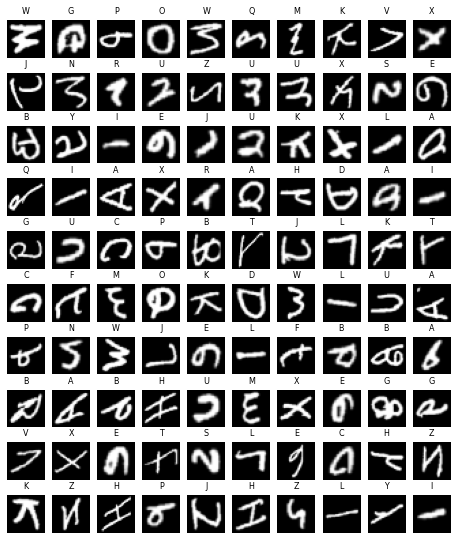

In [120]:
fig = plt.figure(figsize=(8, 8))
for i in range(10):
  for j in range(10):
    index = i * 10 + j
    image = X_train[index]
    # 10x10のタイルのindex番目のaxisという意味
    # 番号は1から始まるので1を足しておく
    ax = fig.add_subplot(10, 10, index + 1)
    plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.99, bottom=0.1)
    # グレースケールで表示
    ax.imshow(X_train[index].reshape(28,28), cmap='gray')
    # 画像の周りにある目盛りを消す
    ax.axis('off')
    # タイトルを追加
    ax.set_title(num2alpha(y_train[index]), size=8)
plt.show()

# PCAを実行する
MNISTの画素数(=特徴の数)は784．
この特徴を2次元にまで次元削減する．

In [7]:
from sklearn import decomposition

In [8]:
# 主成分の数を2としてPCA
pca = decomposition.PCA(n_components=2)
pca_coords = pca.fit_transform(X_train)

In [9]:
# 次元削減後のデータ点たち
pca_coords.shape

(124800, 2)

## プロット時の色指定方法
mnistやfashion-mnistでは10種類だったので手動でlabel2colorのリストを作ったが，今回は26クラスなのでめんどくさい．
`matplotlib.colors.CSS4_COLORS?`で148色のカラーコードがあるのでそこから26個のカラーコードを使う．


In [11]:
import matplotlib
colors = matplotlib.colors.CSS4_COLORS
print(len(colors))
del colors['white']
print(len(colors))
colors?

148
147


Type:        dict
String form: {'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', ' <...> 2EE', 'wheat': '#F5DEB3', 'whitesmoke': '#F5F5F5', 'yellow': '#FFFF00', 'yellowgreen': '#9ACD32'}
Length:      147
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


In [55]:
# これだと重複の可能性がある
# label2color = [random.choice(list(matplotlib.colors.CSS4_COLORS.values())) for _ in range(26)]

In [56]:
# 辞書のvaluesをリストにしてランダムにシャッフルしてから26こだけスライスすれば重複しない
tmp = list(colors.values())
random.shuffle(tmp)
label2color = tmp[:26]
print(label2color)

['#CD853F', '#00CED1', '#FAF0E6', '#3CB371', '#C71585', '#FAEBD7', '#DDA0DD', '#D8BFD8', '#ADFF2F', '#000080', '#E9967A', '#98FB98', '#8B008B', '#800080', '#8B0000', '#D3D3D3', '#F08080', '#556B2F', '#FA8072', '#D2691E', '#008000', '#AFEEEE', '#00FF00', '#696969', '#708090', '#BDB76B']


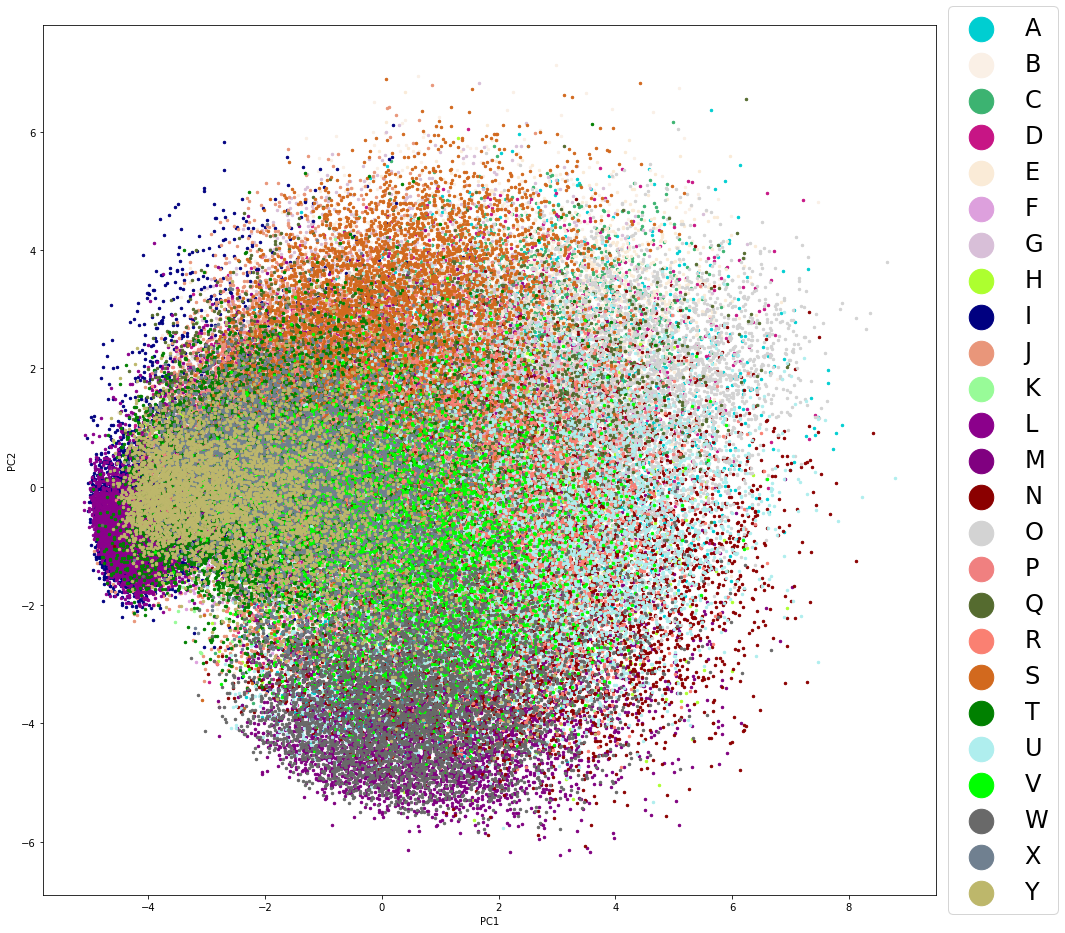

In [57]:
fig, ax = plt.subplots(figsize=(16, 16))
for gt in range(1, 26):
  mask = (y_train == gt)
  ax.scatter(pca_coords[mask, 0], pca_coords[mask, 1], s=6,
            c=label2color[gt], label=num2alpha(gt))
  ax.set_xlabel('PC1')
  ax.set_ylabel('PC2')
  ax.legend(fontsize=12, prop={'size':24}, 
            loc='center left', bbox_to_anchor=(1,0.5), 
            markerscale=10)
plt.show()

## 主成分数=100でPCAして累積寄与率をプロットする


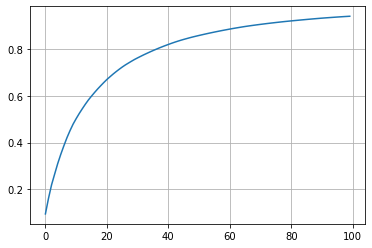

In [19]:
pca2 = decomposition.PCA(n_components=100)
pca2.fit_transform(X_train)
ruiseki = np.cumsum(pca2.explained_variance_ratio_)
plt.plot(ruiseki)
plt.grid()
plt.show()

# t-SNEを用いた次元削減
計算コストの都合で最初は784=>50次元にPCAで次元削減して，その後にt-SNEを適用することで50=>2次元にする．

In [20]:
# PCA
pre_pca = decomposition.PCA(n_components=50)
pre_pca_coords = pre_pca.fit_transform(X_train)
print(pre_pca_coords.shape)

(124800, 50)


In [21]:
# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', verbose=1)
tsne_coords = tsne.fit_transform(pre_pca_coords)
print(tsne_coords.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 124800 samples in 0.003s...


/Users/ishimotoyuuta/miniforge3/envs/kaggle/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 124800 samples in 200.363s...
[t-SNE] Computed conditional probabilities for sample 1000 / 124800
[t-SNE] Computed conditional probabilities for sample 2000 / 124800
[t-SNE] Computed conditional probabilities for sample 3000 / 124800
[t-SNE] Computed conditional probabilities for sample 4000 / 124800
[t-SNE] Computed conditional probabilities for sample 5000 / 124800
[t-SNE] Computed conditional probabilities for sample 6000 / 124800
[t-SNE] Computed conditional probabilities for sample 7000 / 124800
[t-SNE] Computed conditional probabilities for sample 8000 / 124800
[t-SNE] Computed conditional probabilities for sample 9000 / 124800
[t-SNE] Computed conditional probabilities for sample 10000 / 124800
[t-SNE] Computed conditional probabilities for sample 11000 / 124800
[t-SNE] Computed conditional probabilities for sample 12000 / 124800
[t-SNE] Computed conditional probabilities for sample 13000 / 124800
[t-SNE] Computed conditional probabilities for samp

/Users/ishimotoyuuta/miniforge3/envs/kaggle/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 114.096130
[t-SNE] KL divergence after 1000 iterations: 3.833942
(124800, 2)


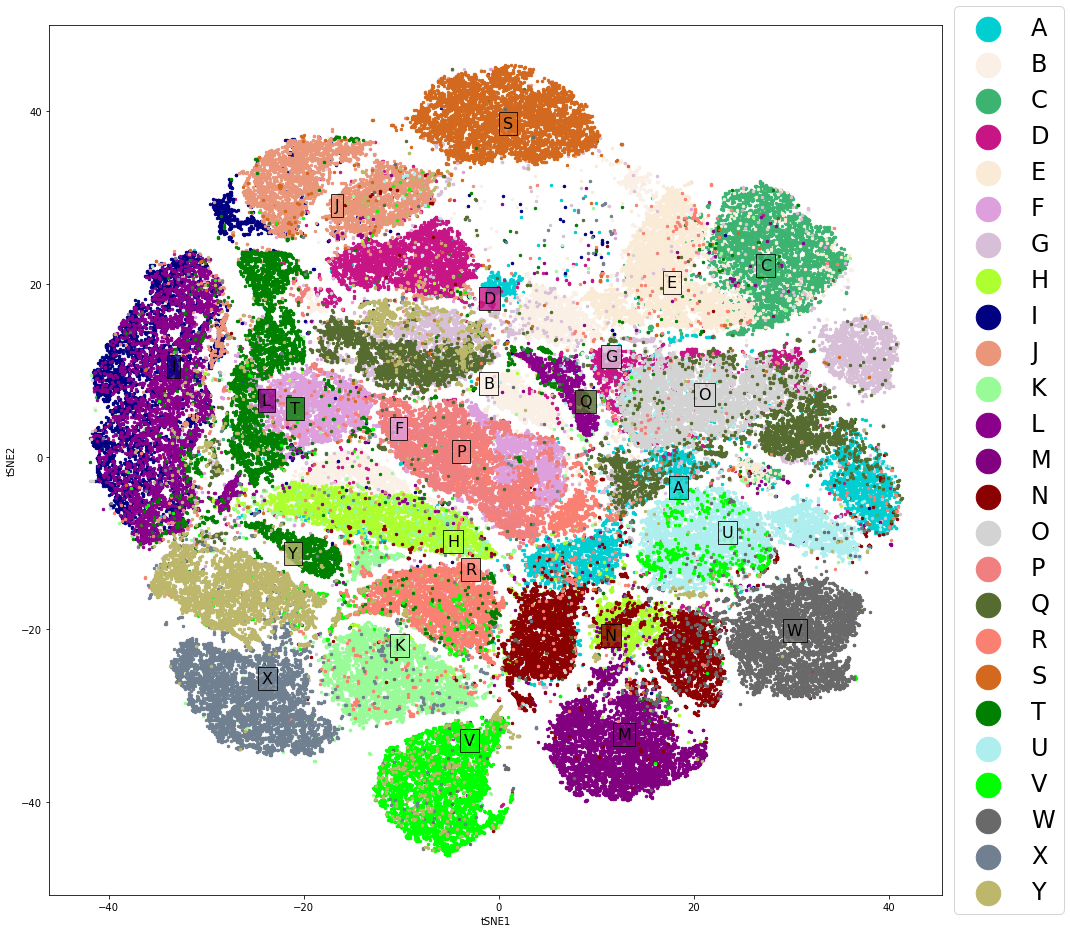

In [121]:
fig, ax = plt.subplots(figsize=(16, 16))
# ラベルごとに圧縮後の座標をプロット
for gt in range(1, 26):
  mask = (y_train == gt)
  ax.scatter(tsne_coords[mask, 0], tsne_coords[mask, 1], s=6, 
            c=label2color[gt], label=num2alpha(gt))
  ax.set_xlabel('tSNE1')
  ax.set_ylabel('tSNE2')
  ax.legend(fontsize=12, prop={'size':24},
            loc='center left', bbox_to_anchor=(1,0.5),
            markerscale=10)
  center = [np.mean(tsne_coords[mask, 0]), np.mean(tsne_coords[mask, 1])]
  # ラベルのテキストを描画
  ax.annotate(num2alpha(gt),
              xy=(center), fontsize=16, color='k',
              bbox={'facecolor':label2color[gt], 'edgecolor':'k', 'alpha':0.8})

plt.show()

# UMAPを用いた次元削減

In [60]:
import umap
umap.__version__

'0.5.1'

In [61]:
reducer = umap.UMAP(n_components=2)
umap_coords = reducer.fit_transform(X_train)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [62]:
print(reducer.n_neighbors, reducer.min_dist)

15 0.1


In [63]:
umap_coords.shape

(124800, 2)

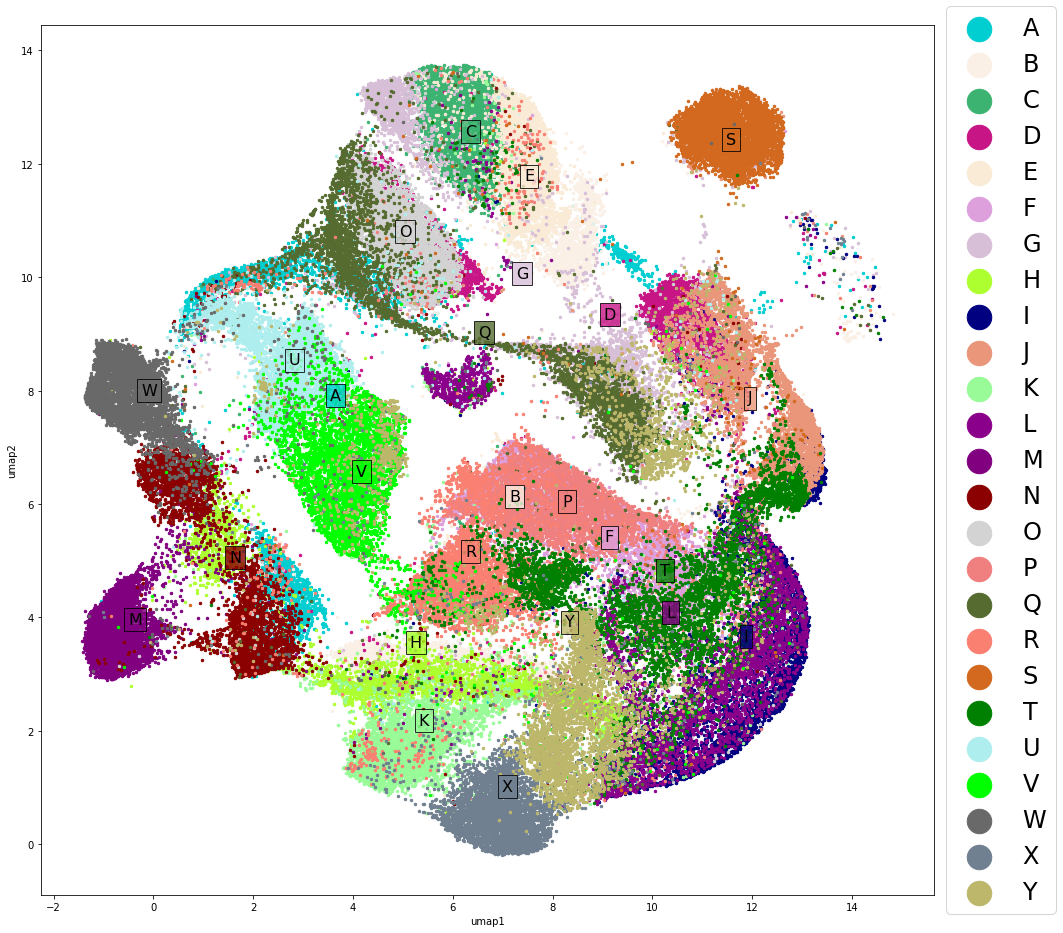

In [74]:
fig, ax = plt.subplots(figsize=(16, 16))
# ラベルごとに圧縮後の座標をプロット
for gt in range(1, 26):
  mask = (y_train == gt)
  ax.scatter(umap_coords[mask, 0], umap_coords[mask, 1], s=6, 
            c=label2color[gt], label=num2alpha(gt))
  ax.set_xlabel('umap1')
  ax.set_ylabel('umap2')
  ax.legend(fontsize=12, prop={'size':24},
            loc='center left', bbox_to_anchor=(1,0.5),
            markerscale=10)
  center = [np.mean(umap_coords[mask, 0]), np.mean(umap_coords[mask, 1])]
  # ラベルのテキストを描画
  ax.annotate(num2alpha(gt),
              xy=(center), fontsize=16, color='k',
              bbox={'facecolor':label2color[gt], 'edgecolor':'k', 'alpha':0.8})

plt.show()

# TensorBoardXを利用する

In [123]:
import tensorboardX as tbx

In [124]:
writer = tbx.SummaryWriter()
writer.add_embedding(mat=X_train[:9000],
                    metadata=list(y_train[:9000]),
                    label_img=torch.tensor(X_train[:9000].reshape(-1, 1, 28, 28)))
writer.close()